In [12]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
from sklearn.preprocessing import label_binarize
import pickle
from MVDD.MVDD import MVDD
import MVDD.MVDD_Generator as mvGen

plt.rc('font', size=12)
warnings.filterwarnings('ignore')

In [2]:
#Load models
hemoMvdd = mvGen.loadMVDDFromFile('TreeFiles/Hemo_Death')
allDataMvdd = mvGen.loadMVDDFromFile('TreeFiles/AllData_WConditions_Death')

In [14]:
#Validation Method
def performValidation(model, data, realScores, aucName):
    y_pred = model.predictScoreSet(data)
    
    acc = accuracy_score(realScores,y_pred)
    recall = recall_score(realScores,y_pred,average='weighted')
    f1 = f1_score(realScores,y_pred,average='weighted')
    prec = precision_score(realScores,y_pred,average='weighted')
    
    #ROC AUC Score
    y_score = label_binarize(y_pred, classes=[1,2,3,4,5])
    y_test = label_binarize(realScores, classes=[1,2,3,4,5])
    fpr, tpr, roc_auc = mvGen.getClassROC(y_test,y_score)
    
    mvGen.getAverageROCGraph(fpr, tpr, roc_auc, aucName)

    print("Accuracy:", acc)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Precision:", prec)
    
    return acc, recall, f1, prec

# Hemo Cohort

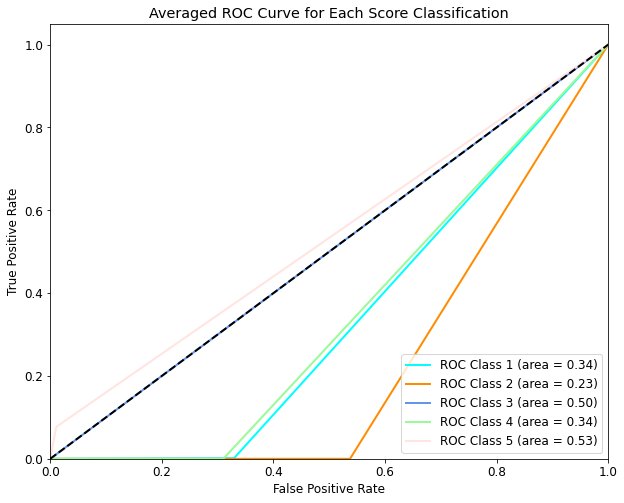

Accuracy: 0.025474461851993375
Recall: 0.025474461851993375
F1 Score: 0.04605356314450651
Precision: 0.252553839753435


In [15]:
hemoCohort = pd.read_csv("Data Validation/ARIC/Preprocessed Data/Clustered_HemoDF_ARIC_Cohort.csv", sep=",", index_col='ID')
deathLabels = hemoCohort['ScoreDeath']

hemo = hemoCohort.drop('ScoreDeath', axis=1)
hemo = hemo.replace(np.inf, 0)
hemo = hemo.fillna(0)

#get predicted scores from model
acc, recall, f1, prec = performValidation(model=hemoMvdd, data=hemo, realScores=deathLabels, aucName='HemoAricCohort')

# Hemo Comm

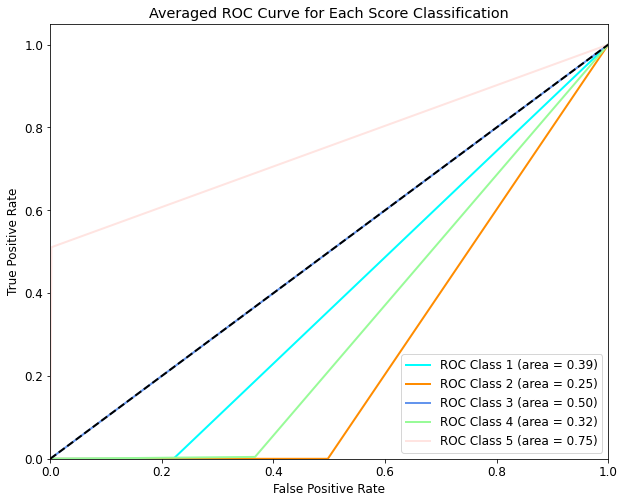

Accuracy: 0.15236234891954584
Recall: 0.15236234891954584
F1 Score: 0.20054852990954486
Precision: 0.2941541858114456


In [17]:
hemoComm = pd.read_csv("Data Validation/ARIC/Preprocessed Data/Clustered_HemoDF_ARIC_Comm.csv", sep=",", index_col='ID')
deathLabels = hemoComm['ScoreDeath']

hemo = hemoComm.drop('ScoreDeath', axis=1)
hemo = hemo.replace(np.inf, 0)
hemo = hemo.fillna(0)

#get predicted scores from model
acc, recall, f1, prec = performValidation(model=hemoMvdd, data=hemo, realScores=deathLabels, aucName='HemoAricComm')

# All Data Cohort

In [37]:
allDataCohort = pd.read_csv("Data Validation/ARIC/Preprocessed Data/Clustered_AllData_ARIC_Cohort.csv", sep=",", index_col='ID')
deathLabels = allDataCohort['ScoreDeath']

allData = allDataCohort.drop('ScoreDeath', axis=1)
allData = allData.replace(np.inf, 0)
allData = allData.fillna(0)

#get predicted scores from model
acc, recall, f1, prec = performValidation(model=allDataMvdd, data=allData, realScores=deathLabels)

ValueError: Number of features of the model must match the input. Model n_features is 118 and input n_features is 66 

# All Data Comm

In [ ]:
allDataComm = pd.read_csv("Data Validation/ARIC/Preprocessed Data/Clustered_AllData_ARIC_Comm.csv", sep=",", index_col='ID')
deathLabels = allDataComm['ScoreDeath']

allData = allDataComm.drop('ScoreDeath', axis=1)
allData = allData.replace(np.inf, 0)
allData = allData.fillna(0)

#get predicted scores from model
acc, recall, f1, prec = performValidation(model=allDataMvdd, data=allData, realScores=deathLabels)